In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import dlib
from skimage import io
from collections import OrderedDict
import sys
sys.path.insert(0, '../')

#sklearn
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.utils import shuffle

#Data augmentation library
import imgaug as ia
from imgaug import augmenters as iaa

#Custom library
#Custom library
from cpe775.align import *
from cpe775.face_detector import FaceEmbedding, LandmarksDetector
from cpe775.model import Model
from cpe775.networks.openface import OpenFace
from cpe775.networks.resnet import resnet18
from cpe775.utils.img_utils import *


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

/home/wesley.passos/miniconda3/envs/face/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# loading the face detector
face_detector = dlib.get_frontal_face_detector()
# loading the align class
align = AlignDlib()
# loading landmarks regressor
net = resnet18(in_shape=(-1, 1, 224, 224), out_shape=(-1, 68, 2))
landmarks_detector = LandmarksDetector(net,'../models/landmarks_detector.pth') 
# loading the embedding model
embedding = FaceEmbedding('../models/openface/nn4.small2.v1.pth')

In [3]:
#Getting the people's name from the folders
people_folder = '../data/pics/'
people = os.listdir(people_folder)

Found 0 faces in the image file ../data/pics/matheus/2014-09-25 10.45.03.jpg
Found 1 faces in the image file ../data/pics/matheus/IMG-20160428-WA0021.jpg
- Face found at Left: 290 Top: 52 Right: 557 Bottom: 320


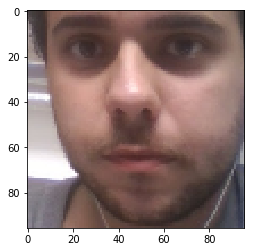

Found 0 faces in the image file ../data/pics/matheus/IMG-20170520-WA0010.jpeg
Found 0 faces in the image file ../data/pics/matheus/IMG-20170617-WA0014.jpeg
Found 1 faces in the image file ../data/pics/matheus/IMG-20151216-WA0047.jpg
- Face found at Left: 110 Top: 418 Right: 664 Bottom: 973


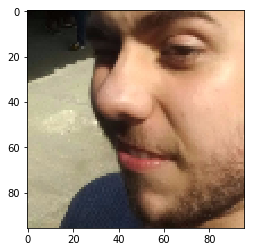

Found 1 faces in the image file ../data/pics/matheus/IMG-20160916-WA0007.jpeg
- Face found at Left: 650 Top: 724 Right: 1315 Bottom: 1390


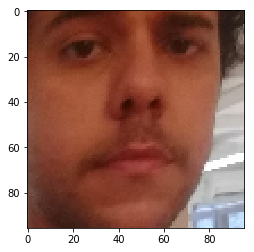

Found 1 faces in the image file ../data/pics/matheus/IMG-20170416-WA0010.jpeg
- Face found at Left: 336 Top: 692 Right: 1135 Bottom: 1491


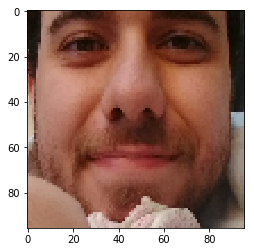

Found 1 faces in the image file ../data/pics/matheus/IMG-20170902-WA0031.jpeg
- Face found at Left: 85 Top: 830 Right: 1043 Bottom: 1789


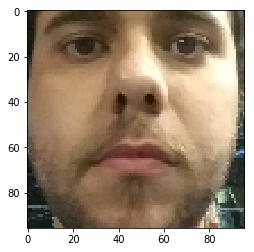

Found 1 faces in the image file ../data/pics/matheus/IMG-20161115-WA0011.jpg
- Face found at Left: 315 Top: 142 Right: 538 Bottom: 365


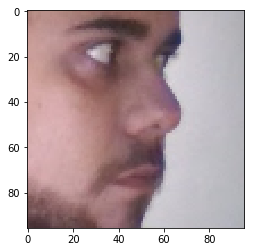

Found 1 faces in the image file ../data/pics/matheus/IMG-20170712-WA0010.jpeg
- Face found at Left: 650 Top: 502 Right: 1315 Bottom: 1168


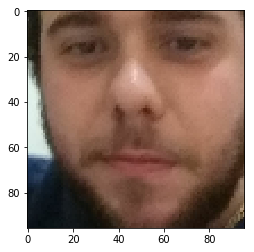

Found 1 faces in the image file ../data/pics/matheus/IMG-20170505-WA0036.jpeg
- Face found at Left: 354 Top: 1094 Right: 1019 Bottom: 1760


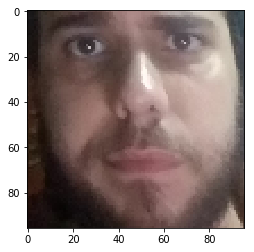

Found 1 faces in the image file ../data/pics/matheus/2013-08-07 10.45.51.jpg
- Face found at Left: 92 Top: 192 Right: 315 Bottom: 415


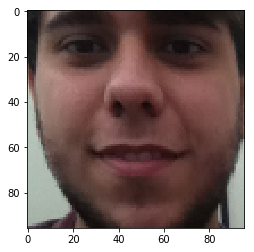

Found 1 faces in the image file ../data/pics/matheus/IMG-20170529-WA0000.jpeg
- Face found at Left: 872 Top: 798 Right: 1537 Bottom: 1464


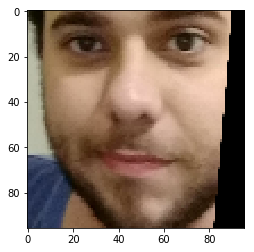

Found 1 faces in the image file ../data/pics/matheus/IMG-20170606-WA0025.jpeg
- Face found at Left: 428 Top: 1020 Right: 1093 Bottom: 1686


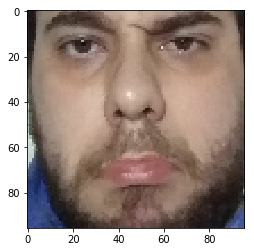

Found 1 faces in the image file ../data/pics/matheus/IMG-20160127-WA0021.jpg
- Face found at Left: 171 Top: 142 Right: 438 Bottom: 409


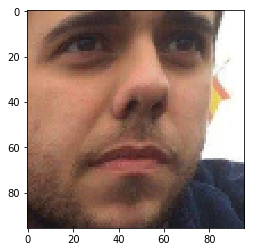

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003383.jpg
- Face found at Left: 349 Top: 766 Right: 617 Bottom: 1033


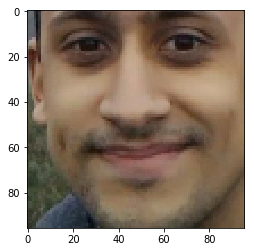

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003375.jpg
- Face found at Left: 33 Top: 718 Right: 418 Bottom: 1103


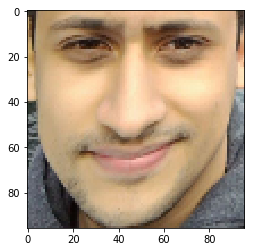

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003392.jpg
- Face found at Left: 205 Top: 562 Right: 526 Bottom: 883


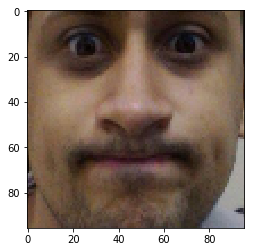

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003384.jpg
- Face found at Left: 76 Top: 761 Right: 461 Bottom: 1146


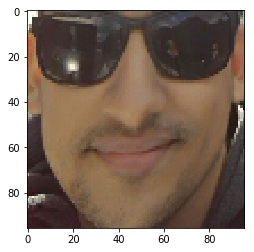

Found 0 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003390.jpg
Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003381.jpg
- Face found at Left: 241 Top: 812 Right: 562 Bottom: 1133


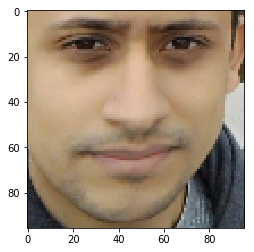

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003380.jpg
- Face found at Left: 27 Top: 669 Right: 348 Bottom: 990


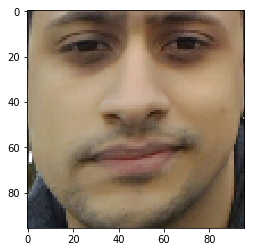

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003386.jpg
- Face found at Left: 205 Top: 241 Right: 526 Bottom: 562


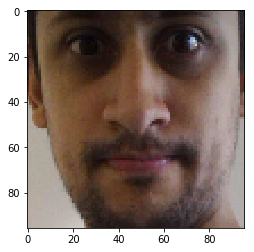

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003388.jpg
- Face found at Left: 230 Top: 617 Right: 498 Bottom: 885


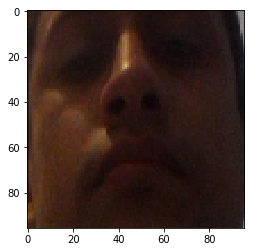

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003382.jpg
- Face found at Left: 277 Top: 598 Right: 598 Bottom: 919


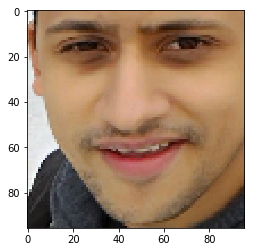

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003377.jpg
- Face found at Left: 1048 Top: 406 Right: 1092 Bottom: 449


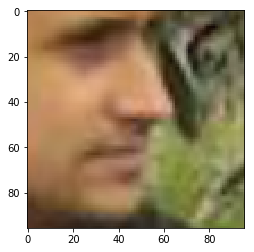

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003376.jpg
- Face found at Left: 379 Top: 706 Right: 646 Bottom: 974


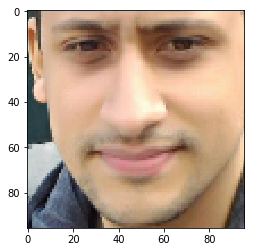

Found 0 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003387.jpg
Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003374.jpg
- Face found at Left: 384 Top: 277 Right: 705 Bottom: 598


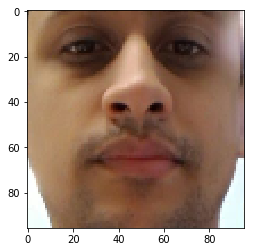

Found 1 faces in the image file ../data/pics/felipe/2017-12-05-PHOTO-00003385.jpg
- Face found at Left: 110 Top: 357 Right: 664 Bottom: 911


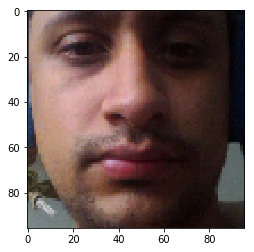

In [4]:
#dictionary to track faces not found
face_not_found = {}
for person in people:
    file_ = glob.glob(people_folder+person+'/*')
    face_not_found[person] = []
    
    for f in file_:
        
        if f[-4:].lower() not in ('.jpg', '.png', 'jpeg'):
            continue
            
        # Load the image
        image = cv2.imread(f)

        # Run the HOG face detector on the image data
        detected_faces = face_detector(image, 1)

        print('Found {} faces in the image file {}'.format(len(detected_faces), f))

        # not use the image if the number of faces detected is different from 1
        if len(detected_faces) is not 1:
            #saving for future reference
            face_not_found[person].append((len(detected_faces), f))
            continue

        # Detected faces are returned as an object with the coordinates
        # of the top, left, right and bottom edges
        face_rect = next(iter(detected_faces))
        print('- Face found at Left: {} Top: {} Right: {} Bottom: {}'\
                .format(face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))
        
        # Find the landmarks given the image and the bounding boxes
        landmarks, _ = landmarks_detector.from_rect(image, face_rect)
        left_eye = np.mean(landmarks[range(36,42), :], axis=-2)
        right_eye = np.mean(landmarks[range(42,48), :] , axis=-2)

        # Align and resize the face given the landmarks
        #thumbnail = align(image, landmarks * [w, h] + [left, top])
        thumbnail = align(image, landmarks)

        path, name = os.path.split(os.path.abspath(f))
        name, ext = os.path.splitext(name)

        if not os.path.isdir(os.path.join(path, 'cropped')):
            os.makedirs(os.path.join(path, 'cropped'))
            
        plt.figure()
        plt.imshow(thumbnail[:,:,::-1])
        plt.show()            
        cv2.imwrite(os.path.join(path, 'cropped', '{}{}'.format(name, ext)), thumbnail)

## Reading cropped images

In [5]:
n = 10 #number of images of each person
files = [str(f) for person in people \
for f in np.random.choice(glob.glob(people_folder+'{}/cropped/*'\
                                                .format(person)), n, replace=False)]

In [6]:
#reading the images to use in training
X = np.stack([io.imread(f) for f in files], axis=0)/255
y = np.hstack([n*[person] for person in people])
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
# #shuffling the training data
# X_train, y_train = shuffle(X, y, random_state=42)
# X_train.shape

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Embedding

In [9]:
X_train_var = torch.autograd.Variable(torch.from_numpy(X_train.transpose((0, 3, 1, 2))), volatile=True).float()
X_test_var = torch.autograd.Variable(torch.from_numpy(X_test.transpose((0, 3, 1, 2))), volatile=True).float()

In [10]:
ckpt = torch.load('../models/openface/nn4.small2.v1.pth')
openface = OpenFace()
openface.load_state_dict(ckpt['state_dict'])

In [11]:
X_train_npy = openface(X_train_var).data.cpu().numpy()
X_test_npy = openface(X_test_var).data.cpu().numpy()

## Training the SVM classifier

In [30]:
k_fold = StratifiedKFold(10)

In [31]:
model = SVC(probability=True, C=2, kernel='linear', tol=1e-6)
model.fit(X_train_npy, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=1e-06, verbose=False)

In [32]:
scores = cross_val_score(model, X_train_npy, y_train, cv=5)

In [33]:
scores

array([ 0.75,  1.  ,  0.75,  1.  ,  1.  ])

In [34]:
predict = cross_val_predict(model, X_test_npy, y_test, cv=2)

In [35]:
predict

array([0, 0, 1, 0])

In [36]:
predict = model.predict_proba(X_test_npy)

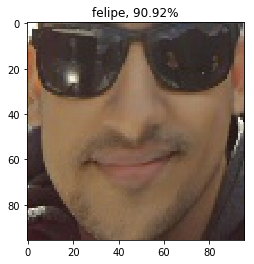

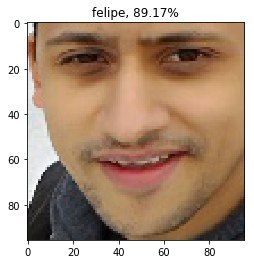

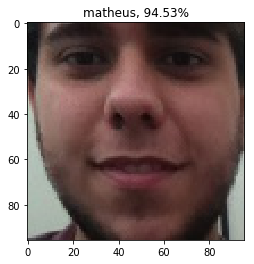

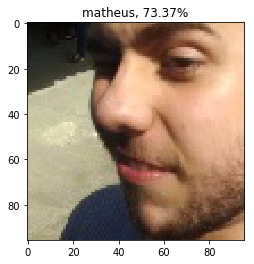

In [37]:
for i, image in enumerate(X_test):
    plt.figure()
    plt.imshow(image)
    idx = np.argmax(predict[i])
    plt.title('{}, {:.2f}%'.format(le.inverse_transform(idx), predict[i][idx]*100))

In [38]:
#saving the model
from sklearn.externals import joblib
joblib.dump((model, le), '../models/face_classification_svm-application.pkl')

['../models/face_classification_svm-application.pkl']